# Nhóm 10 - Challenge 1
**Profile customers of the bank and predict who are likely to churn.**

# Table of Contents
1. [Data Preparation](#1.-Data-preparation)
2. [Data Preprocessing](#2.-Data-preprocessing)
3. [Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)
4. [Model Building](#4.-Model-Building)
6. [Conclusion](#5.-Conclusion)

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data preparation

## 1.1. Load data

In [3]:
data = pd.read_csv('dataset.csv')
data.head()

,local_ref_1,vn_marital_status,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,...,totalSavings2021_heoSo,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021
0,MALE,Married,27.0,262.0,9436.0,1992.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MALE,Single,79.0,769.0,27097.0,1986.0,NaN,NaN,NaN,NaN,...,NaN,0.003666,0.006953,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0
2,MALE,Married,1.0,250.0,8989.0,1980.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MALE,Single,40.0,431.0,18055.0,2001.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MALE,Married,49.0,512.0,20758.0,1989.0,0.0,0.000114,0.000636,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(100000, 50)

In [5]:
data.columns

Index(['local_ref_1', 'vn_marital_status', 'resid_province', 'resid_district',
       'resid_wards', 'birth_incorp_date', ' amount_week ', 'max_amount_week',
       'min_amount_week', 'distinct_payment_code_week',
       'count_payment_code_week', 'distinct_trans_group_week',
       'distinct_ref_no_week', 'amount_month', 'max_amount_month',
       'min_amount_month', 'distinct_payment_code_month',
       'count_payment_code_month', 'distinct_trans_group_month',
       'distinct_ref_no_month', 'amount_3month', 'max_amount_3month',
       'min_amount_3month', 'distinct_payment_code_3month',
       'count_payment_code_3month', 'distinct_trans_group_3month',
       'distinct_ref_no_3month', 'most_act_mar2021_count', 'most_act_mar2021',
       'total_act_mar2021', ' total_amt_mar2021 ', 'most_act_juin2021_count',
       'most_act_juin2021', 'total_act_juin2021', 'total_amt_juin2021',
       'rd_id', 'savingValueMar2021_heoSo', 'savingValueJuin2021_heoSo',
       'totalLoginMar2021_heoSo', 

In [6]:
# Xoá dấu cách thừa ở headers
data.columns = data.columns.str.replace(' ', '')
data.columns

Index(['local_ref_1', 'vn_marital_status', 'resid_province', 'resid_district',
       'resid_wards', 'birth_incorp_date', 'amount_week', 'max_amount_week',
       'min_amount_week', 'distinct_payment_code_week',
       'count_payment_code_week', 'distinct_trans_group_week',
       'distinct_ref_no_week', 'amount_month', 'max_amount_month',
       'min_amount_month', 'distinct_payment_code_month',
       'count_payment_code_month', 'distinct_trans_group_month',
       'distinct_ref_no_month', 'amount_3month', 'max_amount_3month',
       'min_amount_3month', 'distinct_payment_code_3month',
       'count_payment_code_3month', 'distinct_trans_group_3month',
       'distinct_ref_no_3month', 'most_act_mar2021_count', 'most_act_mar2021',
       'total_act_mar2021', 'total_amt_mar2021', 'most_act_juin2021_count',
       'most_act_juin2021', 'total_act_juin2021', 'total_amt_juin2021',
       'rd_id', 'savingValueMar2021_heoSo', 'savingValueJuin2021_heoSo',
       'totalLoginMar2021_heoSo', 'tot

In [7]:
data.dtypes

local_ref_1                      object
vn_marital_status                object
resid_province                  float64
resid_district                  float64
resid_wards                     float64
birth_incorp_date               float64
amount_week                     float64
max_amount_week                 float64
min_amount_week                 float64
distinct_payment_code_week      float64
count_payment_code_week         float64
distinct_trans_group_week       float64
distinct_ref_no_week            float64
amount_month                    float64
max_amount_month                float64
min_amount_month                float64
distinct_payment_code_month     float64
count_payment_code_month        float64
distinct_trans_group_month      float64
distinct_ref_no_month           float64
amount_3month                   float64
max_amount_3month               float64
min_amount_3month               float64
distinct_payment_code_3month      int64
count_payment_code_3month         int64


In [8]:
data.describe()

,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,...,totalLoginJuin2021_heoSo,totalSavings2021_heoSo,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,sectorJuin2021,product_codeJuin2021
count,93431.000000,93435.000000,93433.000000,99990.000000,54800.00000,5.480000e+04,54800.000000,56850.000000,56850.000000,56850.000000,...,7571.000000,7592.000000,29956.000000,29956.000000,29956.000000,29956.000000,29956.000000,20750.000000,29956.000000,29956.000000
mean,32.143379,339.395291,12481.062130,1988.480668,0.00059,1.223446e-03,0.000669,0.336851,0.577766,1.489921,...,29.372606,0.016666,0.003399,0.005937,0.003274,1.780111,17776.982574,407.920916,1803.790292,24257.601716
std,29.360372,278.936947,10064.755806,9.474698,0.00615,6.287416e-03,0.007529,0.526343,2.857005,0.706985,...,56.832050,0.021570,0.016369,0.027024,0.017217,1.033548,5929.056978,44.138990,77.447833,1963.354679
min,0.000000,0.000000,0.000000,1073.000000,0.00000,2.040000e-09,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.010638,0.000000,0.000000,-0.136527,1.000000,1005.000000,306.000000,1690.000000,21113.000000
25%,1.000000,21.000000,637.000000,1983.000000,0.00000,3.060000e-05,0.000011,0.000000,0.000000,1.000000,...,8.000000,0.010638,0.000000,0.000000,0.000000,1.000000,17002.000000,379.000000,1740.000000,23212.000000
50%,30.000000,298.000000,11077.000000,1990.000000,0.00000,1.551020e-04,0.000045,0.000000,0.000000,1.000000,...,16.000000,0.010638,0.000029,0.000094,0.000000,1.000000,21061.000000,386.000000,1830.000000,23231.000000
75%,51.000000,532.000000,21385.000000,1995.000000,0.00000,7.297960e-04,0.000182,1.000000,1.000000,2.000000,...,34.000000,0.010638,0.001500,0.003556,0.001684,2.000000,21064.000000,462.000000,1890.000000,26111.000000
max,96.000000,973.000000,99999.000000,2020.000000,1.00000,1.000000e+00,1.000000,5.000000,331.000000,6.000000,...,1361.000000,1.000000,1.000000,1.000000,1.000000,5.000000,21071.000000,750.000000,1918.000000,51811.000000


In [9]:
data.describe(include=object)

,local_ref_1,vn_marital_status,most_act_mar2021,most_act_juin2021,loaikyhanJuin2021
count,97266,96971,73476,71375,29956
unique,2,7,6,7,3
top,MALE,Single,Giao dich chuyen khoan,Giao dich chuyen khoan,NH
freq,64180,54399,59983,58955,16074


## 1.2. Churn customer definition

**Định nghĩa:** Khách hàng rời bỏ là những khách hàng không phát sinh giao dịch nào trong năm 2021 (tháng 3 và tháng 6), và cũng không sử dụng app Heo số để tiết kiệm. <br>

**Giải thích:** Trong thực tế, ngân hàng sẽ tự động vô hiệu hoá tài khoản của khách hàng khi số dư tài khoản thanh toán về **0 đồng** và không phát sinh giao dịch trong vòng **12 tháng** (Nguồn: https://znews.vn/ngan-hang-xu-ly-tai-khoan-lau-khong-su-dung-the-nao-post1466403.html). Dữ liệu đề bài được tổng hợp theo 3 mốc thời gian, nhưng năm 2021 chỉ có dữ liệu trong 2 tháng giao dịch và app Heo số được ghi nhận, vì vậy nhóm cho rằng những khách hàng có đặc điểm như định nghĩa mới đủ để kết luận là họ đã rời bỏ, không còn sử dụng dịch vụ của ngân hàng. <br>

**Dữ liệu quan sát:** thông tin cá nhân khách hàng và dữ liệu giao dịch năm 2020.<br>
**Dữ liệu tham chiếu:** dữ liệu giao dịch năm 2021.

**Tạo cột: 'churn'. Nhận 2 giá trị: 1 hoặc 0. Trong đó, 1 là KH rời bỏ, 0 là KH không rời bỏ.** <br>
Dựa vào giá trị ở 4 cột 'total_act_mar2021', 'total_act_juin2021', savingValueMar2021_heoSo', 'savingValueJuin2021_heoSo', nếu 4 cột này đều trống (NaN) thì giá trị ở cột 'churn' là 1. <br>

**Các bước xử lý tiếp theo:**
- Tạo cột 'churn' như định nghĩa trên.
- Xoá bỏ những cột dữ liệu của năm 2021.
- Xoá bỏ những cột dữ liệu địa chỉ vì đây là mã vùng, khó xử lý được missing data (dễ gây ra vô lý).
- Xoá bỏ cột định danh rd_id.
- Xoá bỏ những hàng mà 'amount_3month' là NaN, tức là xoá đi những khách hàng không hoạt động trong 3 tháng cuối năm 2020.
- Xử lý missing data còn lại.

In [10]:
# Tạo cột 'churn'
data['churn'] = ((data['total_amt_juin2021'].isnull()) &
                 (data['total_amt_mar2021'].isnull()) &
                 (data['savingValueMar2021_heoSo'].isnull()) &
                 (data['savingValueJuin2021_heoSo'].isnull())).astype(int)
data.head()

,local_ref_1,vn_marital_status,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,...,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021,churn
0,MALE,Married,27.0,262.0,9436.0,1992.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,MALE,Single,79.0,769.0,27097.0,1986.0,NaN,NaN,NaN,NaN,...,0.003666,0.006953,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0,0
2,MALE,Married,1.0,250.0,8989.0,1980.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,MALE,Single,40.0,431.0,18055.0,2001.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,MALE,Married,49.0,512.0,20758.0,1989.0,0.0,0.000114,0.000636,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
# Xoá các cột không phải dữ liệu quan sát
drop_columns = ['resid_province', 'resid_district', 'resid_wards', 'rd_id',\
                'most_act_mar2021_count', 'most_act_mar2021', 'total_act_mar2021', 'total_amt_mar2021',\
                'most_act_juin2021_count', 'most_act_juin2021', 'total_act_juin2021', 'total_amt_juin2021',\
                'savingValueMar2021_heoSo', 'savingValueJuin2021_heoSo', 'totalLoginMar2021_heoSo',\
                'totalLoginJuin2021_heoSo', 'totalSavings2021_heoSo', 'balanceJuin2021', 'nominal_interestJuin2021',\
                'real_interestJuin2021', 'nhomno_xhtdJuin2021', 'categoryJuin2021', 'sub_productJuin2021', \
                'loaikyhanJuin2021', 'sectorJuin2021', 'product_codeJuin2021']
data.drop(columns=drop_columns,axis=1,inplace=True)
data.head()

,local_ref_1,vn_marital_status,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,...,distinct_trans_group_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,churn
0,MALE,Married,1992.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,...,2.0,12.0,0.000073,0.000400,5.920000e-06,0,0,2,33,0
1,MALE,Single,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.000014,0.000068,1.103180e-04,0,0,2,5,0
2,MALE,Married,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,0.000016,0.000060,2.100000e-05,2,3,2,7,0
3,MALE,Single,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,1,1,1
4,MALE,Married,1989.0,0.0,0.000114,0.000636,0.0,0.0,1.0,1.0,...,3.0,12.0,0.000074,0.000380,5.920000e-07,1,11,3,24,0


In [12]:
# Xoá các hàng mà 'amount_3month' có giá trị NaN
cond = ~data['amount_3month'].isnull()
data = data.loc[cond]
data.shape

(86520, 25)

**Nhận xét:** Dữ liệu từ 100000 hàng, 50 cột giảm xuống còn 86520 hàng, 25 cột.

# 2. Data preprocessing

## 2.1. Missing data

In [13]:
# Count missing values if exists
data.isnull().sum()

local_ref_1                      2658
vn_marital_status                2939
birth_incorp_date                  10
amount_week                     31720
max_amount_week                 31720
min_amount_week                 31720
distinct_payment_code_week      31045
count_payment_code_week         31045
distinct_trans_group_week       31045
distinct_ref_no_week            31045
amount_month                     9520
max_amount_month                 9520
min_amount_month                 9520
distinct_payment_code_month      9049
count_payment_code_month         9049
distinct_trans_group_month       9049
distinct_ref_no_month            9049
amount_3month                       0
max_amount_3month                   0
min_amount_3month                   0
distinct_payment_code_3month        0
count_payment_code_3month           0
distinct_trans_group_3month         0
distinct_ref_no_3month              0
churn                               0
dtype: int64

In [14]:
# Xử lý missing data thuộc các cột thông tin cá nhân: 'local_ref_1' và 'vn_marital_status', 'birth_incorp_date' 
# Điền vào giá trị thường xuyên nhất
data["local_ref_1"].fillna(data['local_ref_1'].value_counts().idxmax(), inplace=True)
data["vn_marital_status"].fillna(data['vn_marital_status'].value_counts().idxmax(), inplace=True)
data["birth_incorp_date"].fillna(data['birth_incorp_date'].value_counts().idxmax(), inplace=True)

In [15]:
# Xử lý missing data thuộc các cột liên quan đến giao dịch, 
# Điền vào giá trị 0 (do KH không có giao dịch mới dẫn đến missing)
data["amount_week"].fillna(0, inplace=True)
data["max_amount_week"].fillna(0, inplace=True)
data["min_amount_week"].fillna(0, inplace=True)
data["distinct_payment_code_week"].fillna(0, inplace=True)
data["count_payment_code_week"].fillna(0, inplace=True)
data["distinct_trans_group_week"].fillna(0, inplace=True)
data["distinct_ref_no_week"].fillna(0, inplace=True)
data["amount_month"].fillna(0, inplace=True)
data["max_amount_month"].fillna(0, inplace=True)
data["min_amount_month"].fillna(0, inplace=True)
data["distinct_payment_code_month"].fillna(0, inplace=True)
data["count_payment_code_month"].fillna(0, inplace=True)
data["distinct_trans_group_month"].fillna(0, inplace=True)
data["distinct_ref_no_month"].fillna(0, inplace=True)

In [16]:
# Kiểm tra lại
data.isnull().sum()

local_ref_1                     0
vn_marital_status               0
birth_incorp_date               0
amount_week                     0
max_amount_week                 0
min_amount_week                 0
distinct_payment_code_week      0
count_payment_code_week         0
distinct_trans_group_week       0
distinct_ref_no_week            0
amount_month                    0
max_amount_month                0
min_amount_month                0
distinct_payment_code_month     0
count_payment_code_month        0
distinct_trans_group_month      0
distinct_ref_no_month           0
amount_3month                   0
max_amount_3month               0
min_amount_3month               0
distinct_payment_code_3month    0
count_payment_code_3month       0
distinct_trans_group_3month     0
distinct_ref_no_3month          0
churn                           0
dtype: int64

## 2.2. Transform data

In [17]:
data['local_ref_1'].value_counts()

local_ref_1
MALE      57840
FEMALE    28680
Name: count, dtype: int64

In [18]:
#Tạo cột 'male' để thay thế thế cột 'local_ref_1', male = 1 là giới tính nam, male = 0 là giới tính nữ
data['male'] = (data['local_ref_1'] == 'MALE').astype(int)
data.drop(columns=['local_ref_1'],axis=1,inplace=True)
data.head()

,vn_marital_status,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,...,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,churn,male
0,Married,1992.0,0.0,0.000000,0.000000,0.0,0.0,1.0,1.0,5.650000e-05,...,12.0,7.350000e-05,0.000400,5.920000e-06,0,0,2,33,0,1
1,Single,1986.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.910000e-05,...,1.0,1.380000e-05,0.000068,1.103180e-04,0,0,2,5,0,1
2,Married,1980.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,3.030000e-05,...,2.0,1.570000e-05,0.000060,2.100000e-05,2,3,2,7,0,1
4,Married,1989.0,0.0,0.000114,0.000636,0.0,0.0,1.0,1.0,9.650000e-05,...,12.0,7.450000e-05,0.000380,5.920000e-07,1,11,3,24,0,1
5,Single,1993.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,5.030000e-07,...,4.0,1.310000e-07,0.000001,5.920000e-07,1,5,1,5,0,1


In [19]:
data['vn_marital_status'].value_counts()

vn_marital_status
Single       45506
Married      40604
Other          339
Partner         34
Divorced        26
Widow            7
Seperated        4
Name: count, dtype: int64

In [20]:
# Tạo 7 cột 'single', 'married', 'other', 'partner', 'divorced', 'widow', 'seperated' để thay thế cột 'vn_marital_status'
# Dummy variable
data_encode = pd.get_dummies(data = data, prefix = 'marital_status', prefix_sep='_',
               columns = ['vn_marital_status'],
               drop_first =True, dtype='int8')
data_encode.head()

,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,...,distinct_trans_group_3month,distinct_ref_no_3month,churn,male,marital_status_Married,marital_status_Other,marital_status_Partner,marital_status_Seperated,marital_status_Single,marital_status_Widow
0,1992.0,0.0,0.000000,0.000000,0.0,0.0,1.0,1.0,5.650000e-05,0.000204,...,2,33,0,1,1,0,0,0,0,0
1,1986.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.910000e-05,0.000140,...,2,5,0,1,0,0,0,0,1,0
2,1980.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,3.030000e-05,0.000122,...,2,7,0,1,1,0,0,0,0,0
4,1989.0,0.0,0.000114,0.000636,0.0,0.0,1.0,1.0,9.650000e-05,0.000247,...,3,24,0,1,1,0,0,0,0,0
5,1993.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,5.030000e-07,0.000002,...,1,5,0,1,0,0,0,0,1,0


<span style="background-color: red; color: white; padding: 5px; border-radius: 3px;">"Phần còn lại, nhóm chỉ làm việc với bảng data_encode"!
</sp
>


In [21]:
# Tạo cột 'age' để thay thế cột năm sinh 'birth_incorp_date'
data_encode['age'] = 2024 - data_encode['birth_incorp_date']
data_encode.drop(columns=['birth_incorp_date'],axis=1,inplace=True)
data_encode.head()

,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,...,distinct_ref_no_3month,churn,male,marital_status_Married,marital_status_Other,marital_status_Partner,marital_status_Seperated,marital_status_Single,marital_status_Widow,age
0,0.0,0.000000,0.000000,0.0,0.0,1.0,1.0,5.650000e-05,0.000204,8.280000e-06,...,33,0,1,1,0,0,0,0,0,32.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.910000e-05,0.000140,2.026480e-04,...,5,0,1,0,0,0,0,1,0,38.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,3.030000e-05,0.000122,1.434950e-04,...,7,0,1,1,0,0,0,0,0,44.0
4,0.0,0.000114,0.000636,0.0,0.0,1.0,1.0,9.650000e-05,0.000247,1.180000e-06,...,24,0,1,1,0,0,0,0,0,35.0
5,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,5.030000e-07,0.000002,5.920000e-07,...,5,0,1,0,0,0,0,1,0,31.0


In [22]:
# Giá trị ở các cột amount đang quá nhỏ, khó quan sát
print(data_encode['amount_week'].mean())
print(data_encode['amount_month'].mean())
print(data_encode['amount_3month'].mean())

0.0003739019879796579
0.001102012385922908
0.0006747962545786026


In [23]:
# Nhân giá trị ở các cột amount lên 1 000 000
data_encode[['amount_week','max_amount_week','min_amount_week','amount_month','max_amount_month','min_amount_month',\
         'amount_3month','max_amount_3month','min_amount_3month']]\
= data_encode[['amount_week','max_amount_week','min_amount_week','amount_month','max_amount_month','min_amount_month',\
         'amount_3month','max_amount_3month','min_amount_3month']]*1000000
data_encode.head()

,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,...,distinct_ref_no_3month,churn,male,marital_status_Married,marital_status_Other,marital_status_Partner,marital_status_Seperated,marital_status_Single,marital_status_Widow,age
0,0.0,0.000,0.000,0.0,0.0,1.0,1.0,56.500,204.082,8.280,...,33,0,1,1,0,0,0,0,0,32.0
1,0.0,0.000,0.000,0.0,0.0,0.0,0.0,19.100,139.819,202.648,...,5,0,1,0,0,0,0,1,0,38.0
2,0.0,0.000,0.000,0.0,0.0,0.0,0.0,30.300,122.449,143.495,...,7,0,1,1,0,0,0,0,0,44.0
4,0.0,114.286,635.841,0.0,0.0,1.0,1.0,96.500,247.347,1.180,...,24,0,1,1,0,0,0,0,0,35.0
5,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.503,2.040,0.592,...,5,0,1,0,0,0,0,1,0,31.0


In [24]:
# Kiểm tra dữ liệu trùng lặp
data_encode.duplicated().sum()

12835

In [25]:
data_encode[data_encode.duplicated()]

,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,...,distinct_ref_no_3month,churn,male,marital_status_Married,marital_status_Other,marital_status_Partner,marital_status_Seperated,marital_status_Single,marital_status_Widow,age
423,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.168,1.220,1.770,...,3,1,0,0,0,0,0,1,0,21.0
1644,0.0,1266.63,45.40,0.0,0.0,1.0,11.0,974.777,1266.630,0.592,...,71,0,1,1,0,0,0,0,0,30.0
1884,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,3,1,1,0,0,0,0,1,0,21.0
3735,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,2,1,1,0,0,0,0,1,0,22.0
3755,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,2,1,1,0,0,0,0,1,0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99949,0.0,81.60,2.27,1.0,3.0,2.0,4.0,11.900,81.600,0.592,...,4,0,1,0,0,0,0,1,0,25.0
99961,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.168,1.220,1.770,...,3,0,0,1,0,0,0,0,0,30.0
99968,0.0,0.00,0.00,0.0,0.0,0.0,0.0,5.030,36.700,53.200,...,1,0,1,1,0,0,0,0,0,32.0
99978,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,1,0,1,0,0,0,0,1,0,35.0


Nhóm chỉ xem dữ liệu trùng lặp, KHÔNG thực hiện xoá bỏ, bởi mỗi hàng dữ liệu tương đương với hành vi sử dụng dịch vụ của mỗi khách hàng, không thể có sự phân biệt tuyệt đối.

In [26]:
# Lưu lại bảng data_encode đã clean để xây dựng mô hình
data_encode.to_csv('cleaned_data.csv', index=False, encoding='utf-8')

In [27]:
data_encode.shape

(86520, 30)

# 3. Exploratory Data Analysis

## 3.1. Uni-variate analysis

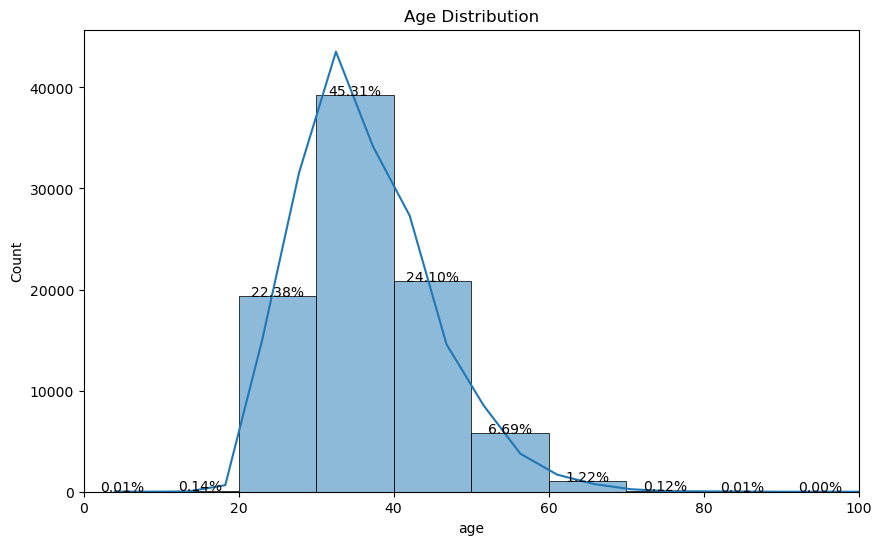

In [28]:
# Age distribution with bins
plt.figure(figsize=(10, 6))
sns.histplot(data_encode['age'], bins=range(0, 101, 10), kde=True)
plt.title('Age Distribution')
plt.xlim(0, 100)

# Tính phần trăm và thêm văn bản phần trăm lên biểu đồ
total = float(len(data_encode['age']))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2.,
                   height + 3,
                   '{:1.2f}%'.format((height / total) * 100),
                   ha="center")

plt.show()

Phân phối về độ tuổi cho thấy khách hàng của ngân hàng có độ tuổi khá trẻ, đa số từ 20-60 tuổi, trong đó gần 50% là độ tuổi từ 30-40 tuổi.

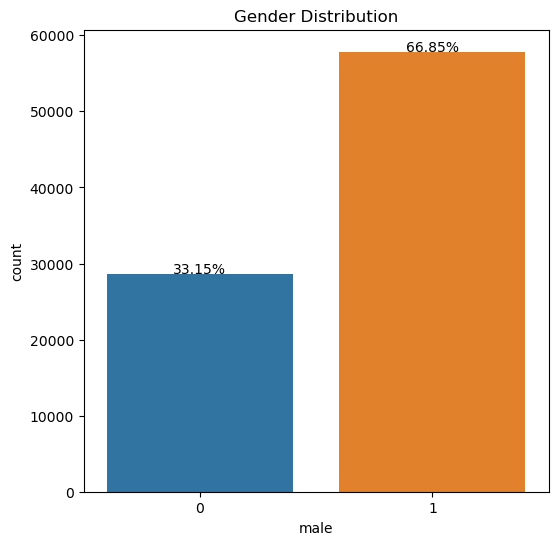

In [29]:
# Gender distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='male', data=data_encode)
plt.title('Gender Distribution')

# Tính phần trăm và thêm văn bản phần trăm lên biểu đồ
total = float(len(data_encode['male']))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2.,
                   height + 3,
                   '{:1.2f}%'.format((height / total) * 100),
                   ha="center")

plt.show()

Nam giới chiếm 2/3 và nữ giới chiểm 1/3. Chênh lệch này là đáng kể, tuy nhiên chưa thể đi đến kết luận gì.

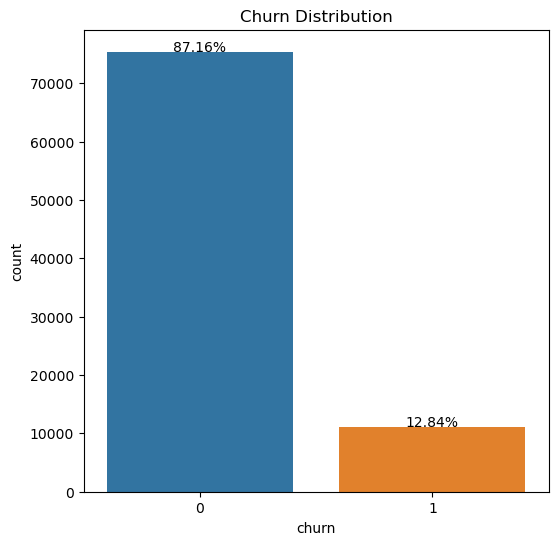

In [30]:
# Churn distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='churn', data=data_encode)
plt.title('Churn Distribution')

# Tính phần trăm và thêm văn bản phần trăm lên biểu đồ
total = float(len(data_encode['churn']))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2.,
                   height + 3,
                   '{:1.2f}%'.format((height / total) * 100),
                   ha="center")

plt.show()

Khi dữ liệu không cân đối (chỉ 16% giá trị là churn), các mô hình có thể dễ dàng đạt được độ chính xác cao bằng cách luôn dự đoán lớp chiếm đa số (không churn). Tuy nhiên, điều này không phản ánh chính xác hiệu suất của mô hình trong việc phát hiện các trường hợp churn.

Bởi vậy, nhóm lựa chọn **F1-score** làm thang đo để đánh giá mô hình. F1-score là trung bình điều hòa của precision và recall, giúp cân bằng giữa việc nhận diện đúng các trường hợp churn (precision) và không bỏ sót nhiều trường hợp churn (recall). F1-score không bị ảnh hưởng nhiều bởi lớp chiếm đa số như accuracy, do đó nó cung cấp một đánh giá chính xác hơn về hiệu suất của mô hình trên các lớp mất cân đối.

## 3.2. Bivariate analysis

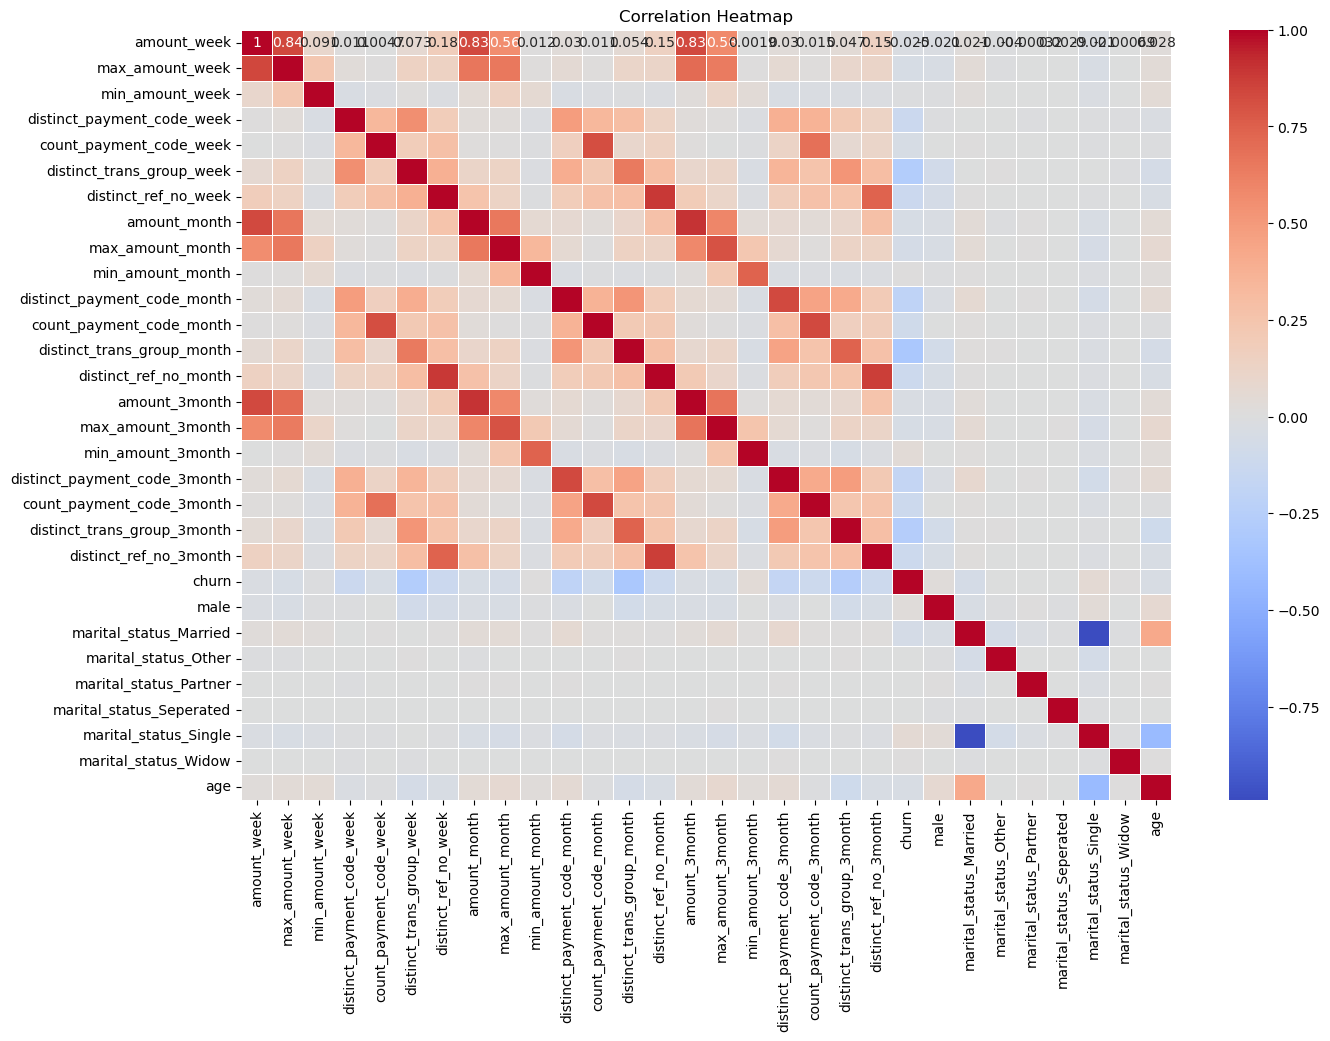

In [31]:
# Correlation heatmap
corr = data_encode.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Hệ số tương quan thấp giữa các features và churn cho thấy rằng không có mối quan hệ tuyến tính mạnh mẽ giữa từng feature riêng lẻ và churn. Điều này không nhất thiết có nghĩa là các feature này không hữu ích, mà có thể là mối quan hệ phi tuyến hoặc kết hợp của nhiều features mới có ý nghĩa.

Các features tuần, tháng và 3 tháng có tương quan chặt chẽ, điều này có thể dẫn đến đa cộng tuyến (multicollinearity). Như vậy, kết hợp những features này chắc hẳn sẽ có mối quan hệ với churn.

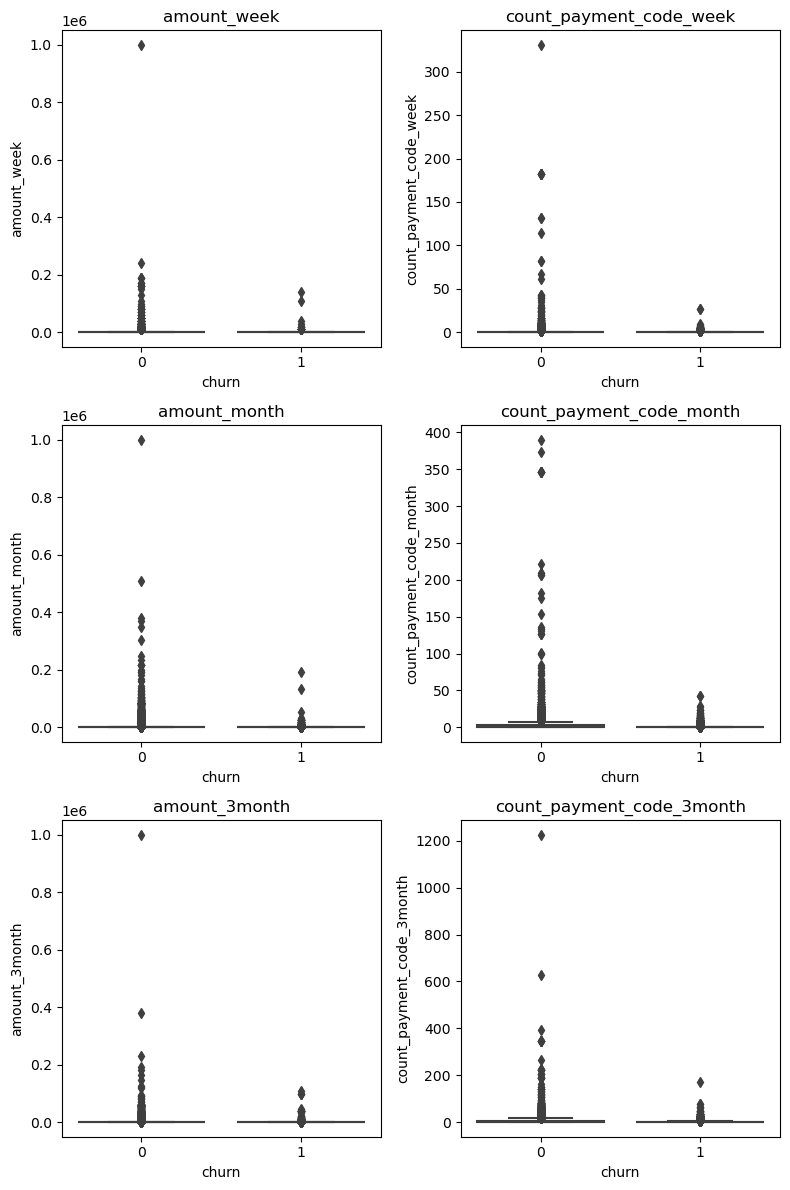

In [32]:
columns_to_plot = ['amount_week', 'count_payment_code_week', 
                   'amount_month', 'count_payment_code_month', 
                   'amount_3month', 'count_payment_code_3month']

plt.figure(figsize=(8, 12))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=data_encode, x="churn", y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

Các outlier có thể đại diện cho các khách hàng có hành vi không bình thường nhưng lại rất quan trọng trong việc dự đoán churn. Ví dụ, một khách hàng có chi tiêu rất cao trong một khoảng thời gian ngắn có thể có khả năng cao rời bỏ dịch vụ.<br>

Loại bỏ outliers có thể làm mất thông tin này và giảm hiệu suất của mô hình. Trong bối cảnh dự đoán churn, các outliers có thể cung cấp thông tin quan trọng về các trường hợp ngoại lệ mà mô hình cần phải nhận diện. Do đó, thay vì loại bỏ outliers, nhóm giữ chúng lại để mô hình có thể học được các mẫu quan trọng từ dữ liệu này.

# 4. Model Building

Three-subset approach

In [33]:
X = data_encode.drop('churn', axis=1)
y = data_encode['churn']
# Splitting data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Nhóm chia tập train 70%, tập validation 15% và tập test 15%.

In [34]:
# Define the models and their respective hyperparameter grids
models = [
    (LogisticRegression(), {
        'C': np.logspace(-3, 3, 3)
    }),
    (RandomForestClassifier(), {
        'n_estimators': [50, 100],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5]
    }),
    (SVC(), {
        'C': np.logspace(-3, 3, 3), 
        'gamma': np.logspace(-3, 3, 3)
    }),
    (KNeighborsClassifier(), {
        'n_neighbors': range(1, 6)
    }),
    (GradientBoostingClassifier(), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1]
    })
]

Nhóm xây dựng mô hình với 5 thuật toán khác nhau: LogisticRegression, RandomForestClassifier, SVC, KNeighborsClassifier, GradientBoostingClassifier.
##### 1. Logistic Regression (Hồi quy logistic)
- **Nguyên lý**: Mô hình xác suất tuyến tính dựa trên hồi quy tuyến tính, sử dụng hàm sigmoid để đưa ra dự đoán xác suất thuộc về lớp 0 hay 1.
- **Ưu điểm**: 
  - Dễ hiểu
  - Dễ triển khai
  - Hiệu quả với dữ liệu có mối quan hệ tuyến tính giữa các đặc trưng và nhãn.
- **Nhược điểm**: Hiệu suất giảm nếu dữ liệu có mối quan hệ phi tuyến, vì mô hình giả định mối quan hệ tuyến tính giữa các đặc trưng và log-odds của biến mục tiêu.

##### 2. Random Forest Classifier (Rừng ngẫu nhiên)
- **Nguyên lý**: Sử dụng nhiều cây quyết định được xây dựng ngẫu nhiên từ các tập con của dữ liệu để đưa ra dự đoán trung bình hoặc chế độ (mode).
- **Ưu điểm**: 
  - Hiệu suất cao
  - Giảm thiểu overfitting
  - Xử lý tốt với dữ liệu không tuyến tính và nhiều đặc trưng.
- **Nhược điểm**: 
  - Tốn tài nguyên tính toán
  - Có thể trở nên phức tạp và khó giải thích.

##### 3. Support Vector Classifier (SVC, Phân loại bằng vector hỗ trợ)
- **Nguyên lý**: Tìm mặt phẳng phân tách tốt nhất (hyperplane) để tối đa hóa khoảng cách giữa các lớp khác nhau trong không gian đặc trưng.
- **Ưu điểm**: 
  - Hiệu quả với dữ liệu phi tuyến
  - Sử dụng kernel để chuyển dữ liệu vào không gian chiều cao hơn.
- **Nhược điểm**: 
  - Tốn thời gian tính toán với dữ liệu lớn
  - Cần điều chỉnh các tham số (như kernel và C).

##### 4. K-Neighbors Classifier (KNN, Phân loại k láng giềng gần nhất)
- **Nguyên lý**: Phân loại điểm dữ liệu mới dựa trên nhãn của K điểm dữ liệu gần nhất trong không gian đặc trưng.
- **Ưu điểm**: 
  - Đơn giản
  - Dễ hiểu
  - Không cần huấn luyện mô hình.
- **Nhược điểm**: 
  - Hiệu suất giảm với dữ liệu lớn
  - Nhạy cảm với dữ liệu nhiễu và lựa chọn giá trị K.

##### 5. Gradient Boosting Classifier (Phân loại bằng tăng cường độ dốc)
- **Nguyên lý**: Kết hợp nhiều mô hình yếu (cây quyết định) theo từng bước để giảm lỗi dự đoán của mô hình tổng thể bằng cách tối ưu hóa hàm mất mát.
- **Ưu điểm**: 
  - Hiệu suất cao
  - Có khả năng xử lý dữ liệu phức tạp và phi tuyến.
- **Nhược điểm**: 
  - Tốn tài nguyên tính toán
  - Dễ bị overfitting nếu không điều chỉnh đúng.

In [35]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(results[best_model]['confusion_matrix'], best_model)

NameError: name 'results' is not defined

In [ ]:
best_models = []
val_scores = []

# Perform hyperparameter tuning for each model
for model, param_grid in models:
    random_search = RandomizedSearchCV(model, param_grid, cv=2, scoring='f1', n_iter=5, random_state=42)
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    val_score = f1_score(y_val, best_model.predict(X_val))

    best_models.append(best_model)
    val_scores.append(val_score)

# Select the best model based on validation set performance
best_model_index = np.argmax(val_scores)
best_model = best_models[best_model_index]
print(f"Best Model: {best_model}")
print(f"Validation Set Score: {val_scores[best_model_index]}")

Sau khi chạy vòng lặp for để huấn luyện mô hình với 5 thuật toán trên, nhóm tìm ra mô hình với thuật toán **RandomForestClassifier** là tốt nhất, <br>với F1-score là **0.55632**

In [ ]:
# Retrain the best model on the combined training and validation sets
X_combined = np.vstack((X_train, X_val))
y_combined = np.hstack((y_train, y_val))
best_model.fit(X_combined, y_combined)

# Evaluate the final model on the testing set
test_score = f1_score(y_test, best_model.predict(X_test))
print("Test Set Score: ", test_score)

Sau khi gộp dữ liệu 2 tập train và validation với nhau và fit thuật toán RandomForestClassifier, nhóm có được mô hình tốt hơn với F1-score là 0.571429

In [ ]:
if isinstance(best_model, RandomForestClassifier):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    random_search = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=2, scoring='f1', n_iter=5, random_state=42)
    random_search.fit(X_combined, y_combined)
    best_model = random_search.best_estimator_

    # Evaluate the best model on the testing set
    test_score = f1_score(y_test, best_model.predict(X_test))
    print("Best Model after Hyperparameter Tuning: ", best_model)
    print("Test Set Score after Hyperparameter Tuning: ", test_score)

In [ ]:
import shap
def performance_plot(y_pred, y_test, plotname):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(y_pred, label='y_val_pred')
    sns.kdeplot(y_test, label='y_val')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title(f'Distribution of y_pred, y_val ({plotname})')
    plt.legend(loc = 4)
    plt.show()
performance_plot(best_model.predict(X_test),y_test, 'RandomForestClassifier')
explainer = shap.Explainer(best_model.predict, X_test)
shap_values = explainer(X_test, max_evals=505)
shap.plots.beeswarm(shap_values)

Nhận thấy F1-score sau quá trình chọn ra mô hình tốt nhất vẫn chưa được cao, nhóm thực hiện thêm thao tác tinh chỉnh mô hình với bộ siêu tham số như trên và thu được mô hình cuối cùng có F1-score là 0.575392.

# 5. Conclusion